In [ ]:
#Declaramos las variables
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
#cargamos los datos en el dataset iris
iris = load_iris()

In [ ]:
dir(iris) #con este comando vemos los atributos de iris

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names #

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#Aqui creamos y llenamos el dataframe con los columnas que queramos
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Ahora le añadimos una columna mas llamada target
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
#Añadimos un anueva columna con el nombre de la flor, usamos una funcion lambda
df[ 'flower_name' ] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0= df[df.target==0]
df1= df[df.target==1]#aqui usamos 3 dataframesdiferentes para poder visualizar la diferencia entre las especies de flores
df2= df[df.target==2]

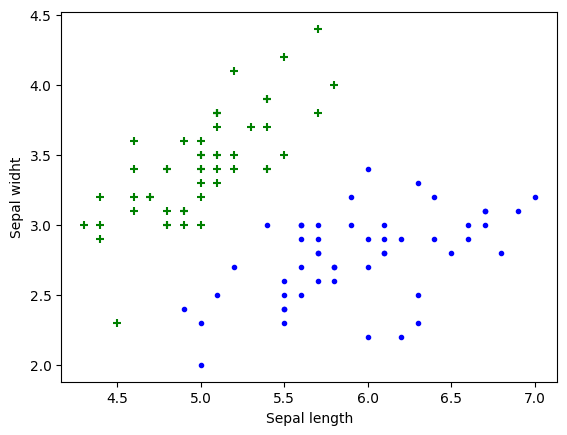

In [ ]:
#Aqui podemos ver la clasificacion de las plantas
plt.xlabel('Sepal length')
plt.ylabel('Sepal widht')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue', marker='.')

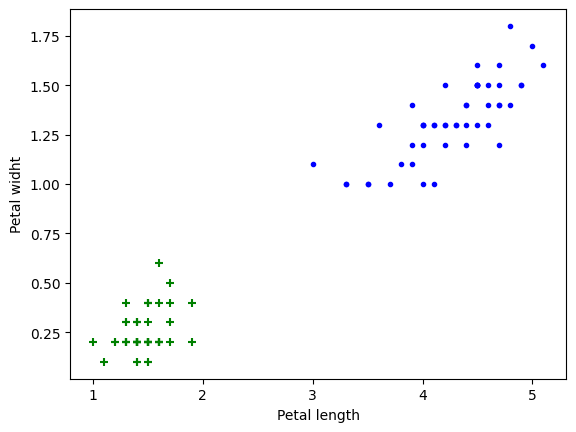

In [ ]:
#Hacemos lo mismo pero para el petalo que tienen las plantas
plt.xlabel('Petal length')
plt.ylabel('Petal widht')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue', marker='.')

In [ ]:
x = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [ ]:
#Aqui separamos el dataset en datos de entrenamiento y de prueba, el tamaño
#del test es del 20% o sea 70% entrenamiento 20% prueba
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
len(x_train), len(x_test)

(120, 30)

In [ ]:
#inicializamos nuestro modelo
model = SVC()

In [ ]:
#LLamamos al metodo FIT para entrenar el modelo
model.fit(x_train, y_train)

SVC()

In [ ]:
#Para ver la presicion del modelo usamos metodo score
model.score(x_test, y_test)

1.0

In [ ]:
#ahora predecimos conforme otros parametros con algunos datos randmo
model.predict([[5.2,4.0,6.4,2.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])